In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('police_killings_MPV.csv')
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,Unknown race,NaN,6/9/2020,337 Garrison Place,Virginia Beach,VA,23452.0,Virginia Beach City,Virginia Beach Police Department,VA1280000,Gunshot,Police were called at 4:26 a.m. for a domestic...,Pending investigation,No known charges,https://www.wtkr.com/news/domestic-incident-le...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8448,28737.0
1,Name withheld by police,Unknown,Male,Unknown race,NaN,5/9/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,Cook,Chicago Police Department,ILCPD0000,Gunshot,A man allegedly stabbed someone and then alleg...,Pending investigation,No known charges,https://www.chicagotribune.com/news/breaking/c...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8446,28734.0
2,Name withheld by police,61,Male,Unknown race,NaN,5/9/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,A man was detained by an off-duty Floresville ...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/police-...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,off-duty,NaN,8447,28735.0
3,Name withheld by police,22,Male,Unknown race,NaN,5/9/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,Calhoun,"Battle Creek Police Department, Calhoun County...",MI1323700;MI1311300,Gunshot,Following a 15-minute pursuit after two Battle...,Pending investigation,No known charges,https://www.battlecreekenquirer.com/story/news...,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,NaN,8449,28736.0
4,Steven D. Smith,33,Male,Unknown race,NaN,4/9/2020,200 N. State Street,Syracuse,NY,13203.0,Onondaga,Syracuse Police Department,NY0330100,Gunshot,Officers responded to the Sunoco Gas Station f...,Pending investigation,No known charges,https://cnycentral.com/news/local/large-police...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,8444,28726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,1/1/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,Pueblo,Pueblo Police Department,CO0510100,Gunshot,Christopher was with two others in a car. Pueb...,Justified,No known charges,http://www.krdo.com/news/Pueblo-Police-shoot-k...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4,12176.0
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,1/1/2013,720 Terrace Way,Bakersfield,CA,93304.0,Kern,Bakersfield Police Department,CA0150200,Gunshot,Officers responded to reports of gunshots at a...,Justified,No known charges,http://www.bakersfieldcalifornian.com/local/br...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,3,12174.0
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,Douglas,Omaha Police Department,NB0280200,Gunshot,Omaha Police Department responded to a 911 dom...,Grand jury/No bill or Cleared,No known charges,http://www.ketv.com/news/Pol

In [ ]:
df_copy = df.copy(deep=True);
df_copy

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,Unknown race,NaN,6/9/2020,337 Garrison Place,Virginia Beach,VA,23452.0,Virginia Beach City,Virginia Beach Police Department,VA1280000,Gunshot,Police were called at 4:26 a.m. for a domestic...,Pending investigation,No known charges,https://www.wtkr.com/news/domestic-incident-le...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8448,28737.0
1,Name withheld by police,Unknown,Male,Unknown race,NaN,5/9/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,Cook,Chicago Police Department,ILCPD0000,Gunshot,A man allegedly stabbed someone and then alleg...,Pending investigation,No known charges,https://www.chicagotribune.com/news/breaking/c...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8446,28734.0
2,Name withheld by police,61,Male,Unknown race,NaN,5/9/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,Bexar,San Antonio Police Department,TXSPD0000,Gunshot,A man was detained by an off-duty Floresville ...,Pending investigation,No known charges,https://news4sanantonio.com/news/local/police-...,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,off-duty,NaN,8447,28735.0
3,Name withheld by police,22,Male,Unknown race,NaN,5/9/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,Calhoun,"Battle Creek Police Department, Calhoun County...",MI1323700;MI1311300,Gunshot,Following a 15-minute pursuit after two Battle...,Pending investigation,No known charges,https://www.battlecreekenquirer.com/story/news...,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,NaN,8449,28736.0
4,Steven D. Smith,33,Male,Unknown race,NaN,4/9/2020,200 N. State Street,Syracuse,NY,13203.0,Onondaga,Syracuse Police Department,NY0330100,Gunshot,Officers responded to the Sunoco Gas Station f...,Pending investigation,No known charges,https://cnycentral.com/news/local/large-police...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,8444,28726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,1/1/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,Pueblo,Pueblo Police Department,CO0510100,Gunshot,Christopher was with two others in a car. Pueb...,Justified,No known charges,http://www.krdo.com/news/Pueblo-Police-shoot-k...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4,12176.0
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,1/1/2013,720 Terrace Way,Bakersfield,CA,93304.0,Kern,Bakersfield Police Department,CA0150200,Gunshot,Officers responded to reports of gunshots at a...,Justified,No known charges,http://www.bakersfieldcalifornian.com/local/br...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,3,12174.0
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,Douglas,Omaha Police Department,NB0280200,Gunshot,Omaha Police Department responded to a 911 dom...,Grand jury/No bill or Cleared,No known charges,http://www.ketv.com/news/Pol

Data Cleaning:Removing unnecessary Columns

In [ ]:
df_copy=df_copy.drop(['URL of image of victim'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Street Address of Incident'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Zipcode'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Agency responsible for death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['ORI Agency Identifier (if available)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['A brief description of the circumstances surrounding the death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Criminal Charges?'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Link to news article or photo of official document'],axis=1);

In [ ]:
df_copy=df_copy.drop(['WaPo ID (If included in WaPo database)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['MPV ID'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Fatal Encounters ID'],axis=1);
df_copy

,Victim's name,Victim's age,Victim's gender,Victim's race,Date of Incident (month/day/year),City,State,County,Cause of death,Official disposition of death (justified or other),Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )
0,Name withheld by police,Unknown,Male,Unknown race,6/9/2020,Virginia Beach,VA,Virginia Beach City,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,5/9/2020,Chicago,IL,Cook,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,5/9/2020,San Antonio,TX,Bexar,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,off-duty,NaN
3,Name withheld by police,22,Male,Unknown race,5/9/2020,Battle Creek,MI,Calhoun,Gunshot,Pending investigation,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,4/9/2020,Syracuse,NY,Onondaga,Gunshot,Pending investigation,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,Pueblo,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Suburban
8423,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,Kern,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban
8424,Tyree Bell,31,Male,Black,1/1/2013,Omaha,NE,Douglas,Gunshot,Grand jury/No bill or Cleared,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban
8425,Mark Chavez,49,Male,Hispanic,1/1/2013,Farmington,NM,San Juan,Gunshot,Unreported,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,Urban


#Renaming the column names to appropriate ones
---



---



In [ ]:
df_copy = df_copy.rename({'Victim\'s age': 'age','Victim\'s name':'name','Victim\'s gender': 'gender','Victim\'s race' : 'race' ,'Date of Incident (month/day/year)':'date','Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'Geography','Body Camera (Source: WaPo)':'Body Camera','Fleeing (Source: WaPo)':'Fleeing','Alleged Threat Level (Source: WaPo)':'Alleged Threat Level','Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)':'Alleged Weapon', },axis=1)
df_copy

,name,age,gender,race,date,City,State,County,Cause of death,Official disposition of death (justified or other),Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon,Alleged Threat Level,Fleeing,Body Camera,Off-Duty Killing?,Geography
0,Name withheld by police,Unknown,Male,Unknown race,6/9/2020,Virginia Beach,VA,Virginia Beach City,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,5/9/2020,Chicago,IL,Cook,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,5/9/2020,San Antonio,TX,Bexar,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,off-duty,NaN
3,Name withheld by police,22,Male,Unknown race,5/9/2020,Battle Creek,MI,Calhoun,Gunshot,Pending investigation,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,4/9/2020,Syracuse,NY,Onondaga,Gunshot,Pending investigation,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,Pueblo,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Suburban
8423,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,Kern,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban
8424,Tyree Bell,31,Male,Black,1/1/2013,Omaha,NE,Douglas,Gunshot,Grand jury/No bill or Cleared,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban
8425,Mark Chavez,49,Male,Hispanic,1/1/2013,Farmington,NM,San Juan,Gunshot,Unreported,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,Urban


#Replacement Strategies

In [ ]:
df_copy['age'].unique()

array(['Unknown', '61', '22', '33', '38', '48', '53', '18', '50', '58',
       '36', '29', '26', '25', '43', '44', '17', '30', '31', '41', '47',
       '39', '35', '42', '37', '21', '60', '27', '34', '32', '52', '28',
       '40', '45', '51', '55', '67', '63', '56', '73', '49', '24', '59',
       '23', '20', '62', '70', '57', '68', '19', '81', '65', '46', '69',
       '64', '54', '16', '66', '82', '83', '75', '15', '76', '74', '77',
       '80', '14', '71', '6', '78', '72', '84', '89', '1', '40s', '79',
       '91', '13', '86', '10', '12', '95', '5', '93', '7', '107', '87'],
      dtype=object)

In [ ]:
df_copy[	'age']= df_copy[	'age'].str.strip('s')

In [ ]:
import numpy as np
df_copy['age'].replace('Unknown', np.nan, inplace = True)

In [ ]:
df_copy['age'].isnull().sum()

271

Replacement Strategy: Replacing null values with mean

In [ ]:
df_copy['New_age_mean'] = df_copy['age']
df_copy['New_age_mean']=pd.to_numeric(df_copy['New_age_mean'])


In [ ]:
df_copy['New_age_mean'].describe()

count    8156.000000
mean       36.827734
std        13.145150
min         1.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       107.000000
Name: New_age_mean, dtype: float64

In [ ]:
df_copy['New_age_mean'].fillna(df_copy['New_age_mean'].mean(), inplace=True)

In [ ]:
df_copy['New_age_mean'].unique()

array([ 36.82773418,  61.        ,  22.        ,  33.        ,
        38.        ,  48.        ,  53.        ,  18.        ,
        50.        ,  58.        ,  36.        ,  29.        ,
        26.        ,  25.        ,  43.        ,  44.        ,
        17.        ,  30.        ,  31.        ,  41.        ,
        47.        ,  39.        ,  35.        ,  42.        ,
        37.        ,  21.        ,  60.        ,  27.        ,
        34.        ,  32.        ,  52.        ,  28.        ,
        40.        ,  45.        ,  51.        ,  55.        ,
        67.        ,  63.        ,  56.        ,  73.        ,
        49.        ,  24.        ,  59.        ,  23.        ,
        20.        ,  62.        ,  70.        ,  57.        ,
        68.        ,  19.        ,  81.        ,  65.        ,
        46.        ,  69.        ,  64.        ,  54.        ,
        16.        ,  66.        ,  82.        ,  83.        ,
        75.        ,  15.        ,  76.        ,  74.  

In [ ]:
df_copy[	'New_age_mean']

0       36.827734
1       36.827734
2       61.000000
3       22.000000
4       33.000000
          ...    
8422    21.000000
8423    26.000000
8424    31.000000
8425    49.000000
8426    26.000000
Name: New_age_mean, Length: 8427, dtype: float64

Replacement Strategy: Replacing null values with mode

In [ ]:
from scipy import stats
df_copy['New_age_mode'] = df_copy['age']
age_mode, count_of_mode = stats.mode(df_copy["New_age_mode"])
int_mode = int(age_mode)
df_copy['New_age_mode']

0       NaN
1       NaN
2        61
3        22
4        33
       ... 
8422     21
8423     26
8424     31
8425     49
8426     26
Name: New_age_mode, Length: 8427, dtype: object

In [ ]:
df_copy['New_age_mode'].fillna(int_mode, inplace=True)

In [ ]:
df_copy['New_age_mode']

0       25
1       25
2       61
3       22
4       33
        ..
8422    21
8423    26
8424    31
8425    49
8426    26
Name: New_age_mode, Length: 8427, dtype: object

Replacement using Standard Deviation

In [ ]:
df_copy['New_age_sd'] = df_copy['age']
df_copy['New_age_sd']=pd.to_numeric(df_copy['New_age_sd'])

In [ ]:
df_copy['New_age_sd'].fillna(df_copy['New_age_sd'].std(), inplace=True)

In [ ]:
df_copy['New_age_sd']

0       13.14515
1       13.14515
2       61.00000
3       22.00000
4       33.00000
          ...   
8422    21.00000
8423    26.00000
8424    31.00000
8425    49.00000
8426    26.00000
Name: New_age_sd, Length: 8427, dtype: float64

Replacement using Median

In [ ]:
df_copy['New_age_median'] = df_copy['age']
df_copy['New_age_median']=pd.to_numeric(df_copy['New_age_median'])
df_copy['New_age_median'].fillna(df_copy['New_age_median'].median(), inplace=True)
df_copy['New_age_median']

0       35.0
1       35.0
2       61.0
3       22.0
4       33.0
        ... 
8422    21.0
8423    26.0
8424    31.0
8425    49.0
8426    26.0
Name: New_age_median, Length: 8427, dtype: float64

Replacement using INTERPOLATION

In [ ]:
df_copy['New_age_interpolate'] = df_copy['age']
df_copy['New_age_interpolate']=pd.to_numeric(df_copy['New_age_interpolate'])
df_copy['New_age_interpolate'].interpolate(method='linear', direction = 'forward', inplace=True)

Remove the first two rows because in interpolation technique if a value is nan and it does not have forward or previous value it will be nan. 

In [ ]:
# df_copy = df_copy.iloc[1: , :]
# df_copy = df_copy.iloc[1: , :]
df_copy

,name,age,gender,race,date,City,State,County,Cause of death,Official disposition of death (justified or other),Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon,Alleged Threat Level,Fleeing,Body Camera,Off-Duty Killing?,Geography,New_age_mean,New_age_mode,New_age_sd,New_age_median,New_age_interpolate
0,Name withheld by police,NaN,Male,Unknown race,6/9/2020,Virginia Beach,VA,Virginia Beach City,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN
1,Name withheld by police,NaN,Male,Unknown race,5/9/2020,Chicago,IL,Cook,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN
2,Name withheld by police,61,Male,Unknown race,5/9/2020,San Antonio,TX,Bexar,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,off-duty,NaN,61.000000,61,61.00000,61.0,61.0
3,Name withheld by police,22,Male,Unknown race,5/9/2020,Battle Creek,MI,Calhoun,Gunshot,Pending investigation,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,22.000000,22,22.00000,22.0,22.0
4,Steven D. Smith,33,Male,Unknown race,4/9/2020,Syracuse,NY,Onondaga,Gunshot,Pending investigation,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,33.000000,33,33.00000,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,Pueblo,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Suburban,21.000000,21,21.00000,21.0,21.0
8423,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,Kern,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,26.000000,26,26.00000,26.0,26.0
8424,Tyree Bell,31,Male,Black,1/1/2013,Omaha,NE,Douglas,Gunshot,Grand jury/No bill or Cleared,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,31.000000,31,31.00000,31.0,31.0
8425,Mark Chavez,49,Male,Hispanic,1/1/2013,Farmington,NM,San Juan,Gunshot,Unreported,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,Urban,49.000000,49,49.00000,49.0,49.0


In [ ]:

df_copy.isnull().sum()

name                                                     0
age                                                    271
gender                                                  12
race                                                     0
date                                                     0
City                                                     6
State                                                    0
County                                                  14
Cause of death                                           0
Official disposition of death (justified or other)      11
Symptoms of mental illness?                              9
Unarmed/Did Not Have an Actual Weapon                    0
Alleged Weapon                                           0
Alleged Threat Level                                  2447
Fleeing                                               2881
Body Camera                                           2994
Off-Duty Killing?                                     81

In [ ]:
states_sum = df_copy.groupby(['State', "race"]).count()
states_sum.head()

name  age  ...  New_age_median  New_age_interpolate
State race                         ...                                     
AK    Black                4    4  ...               4                    4
      Hispanic             1    1  ...               1                    1
      Native American     12   11  ...              12                   12
      Pacific Islander     1    1  ...               1                    1
      Unknown race         6    6  ...               6                    6

[5 rows x 21 columns]

##Visualization
#Representation of Police Killings across all the states in USA

In [ ]:
import folium
usa_population = pd.read_csv('usa_population_2019.csv')
state_geo = 'us-states.json'
df_copy.dropna(axis=1, how='all', inplace=True)
killing_per_state = df_copy[['State','name']].groupby(['State']).count().reset_index()
killing_per_state.columns = ['State', 'Kills']
killing_per_state.head()

,State,Kills
0,AK,47
1,AL,153
2,AR,117
3,AZ,373
4,CA,1294


In [ ]:
map_usa = folium.Map(location=[37, -102], zoom_start=5)

folium.Choropleth(
    state_geo,
    name='choropleth',
    data=killing_per_state,
    columns=['State', 'Kills'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of police Kills by state',
    highlight=True
).add_to(map_usa)

map_usa

In [ ]:
usa_population.tail()

,Geographic Area,Postal Code,Total Resident Population
51,Virginia,VA,8535519
52,Washington,WA,7614893
53,West Virginia,WV,1792147
54,Wisconsin,WI,5822434
55,Wyoming,WY,578759


In [ ]:
kill_and_pop_per_state = killing_per_state.merge(usa_population,how='inner',left_on='State',right_on='Postal Code')
kill_and_pop_per_state.head()

,State,Kills,Geographic Area,Postal Code,Total Resident Population
0,AK,47,Alaska,AK,731545
1,AL,153,Alabama,AL,4903185
2,AR,117,Arkansas,AR,3017804
3,AZ,373,Arizona,AZ,7278717
4,CA,1294,California,CA,39512223


In [ ]:
kill_and_pop_per_state['Killings per 1M ppl'] = kill_and_pop_per_state['Kills']/kill_and_pop_per_state['Total Resident Population']*1000000
kill_and_pop_per_state.head()

,State,Kills,Geographic Area,Postal Code,Total Resident Population,Killings per 1M ppl
0,AK,47,Alaska,AK,731545,64.247586
1,AL,153,Alabama,AL,4903185,31.204207
2,AR,117,Arkansas,AR,3017804,38.769913
3,AZ,373,Arizona,AZ,7278717,51.245295
4,CA,1294,California,CA,39512223,32.749360


In [ ]:
import json
with open(state_geo, encoding="utf8") as f:
    map_data = json.load(f)

# properties 
[key for key in map_data['features'][0]['properties']]

['name']

In [ ]:
states_order = [state['id'] for state in map_data['features']]
for idx in range(len(states_order)):
    map_data['features'][idx]['properties']['Killings per 1M ppl'] = round(kill_and_pop_per_state[kill_and_pop_per_state.State == states_order[idx]]['Killings per 1M ppl'].values[0],2)
    map_data['features'][idx]['properties']['Kills'] = int(kill_and_pop_per_state[kill_and_pop_per_state.State == states_order[idx]]['Kills'].values[0])
    map_data['features'][idx]['properties']['Population'] = int(kill_and_pop_per_state[kill_and_pop_per_state.State == states_order[idx]]['Total Resident Population'].values[0])

Number of police kills every 1M ppl by state in USA

In [ ]:
map_usa = folium.Map(location=[37, -102], zoom_start=5)

chorop_map = folium.Choropleth(
    geo_data=map_data,
    name='choropleth',
    data=kill_and_pop_per_state,
    columns=['State', 'Killings per 1M ppl'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of police kills every 1M ppl by state',
    highlight=True
).add_to(map_usa)

folium.LayerControl().add_to(map_usa)
chorop_map.geojson.add_child(
    folium.features.GeoJsonTooltip(['name', 'Killings per 1M ppl', 'Kills','Population'])
)

map_usa

In [ ]:
states_sum['New_age_mean'].head()

State  race            
AK     Black                4
       Hispanic             1
       Native American     12
       Pacific Islander     1
       Unknown race         6
Name: New_age_mean, dtype: int64

### Police Killings as Percentage with respective to race in California,New York and Maryland

Text(0.5, 1.0, 'Police Killings as Percentage in California')

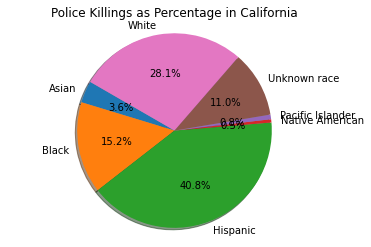

In [ ]:
race_AK=states_sum.loc['CA']['New_age_mean'].index
import matplotlib.pyplot as plt
labels = race_AK
sizes = states_sum.loc['CA']["New_age_mean"]
explode = (0.3, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Police Killings as Percentage in California')

Text(0.5, 1.0, 'Police Killings as Percentage in New York')

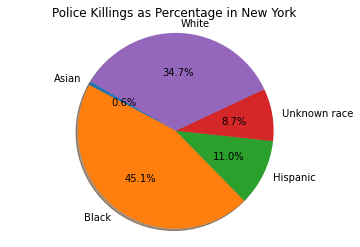

In [ ]:
race_AK=states_sum.loc['NY']['New_age_mean'].index
import matplotlib.pyplot as plt
labels = race_AK
sizes = states_sum.loc['NY']["New_age_mean"]
explode = (0.3, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Police Killings as Percentage in New York')

Text(0.5, 1.0, 'Police Killings as Percentage in Maryland')

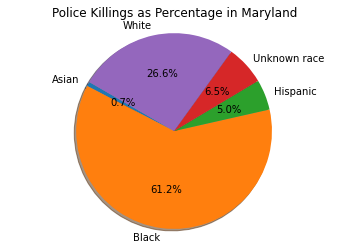

In [ ]:
race_AK=states_sum.loc['MD']['New_age_mean'].index
import matplotlib.pyplot as plt
labels = race_AK
sizes = states_sum.loc['MD']["New_age_mean"]
explode = (0.3, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Police Killings as Percentage in Maryland')

In [ ]:
def pull_race_data(data, race):
    new_data = data[data["race"] == race]
    sort_data = new_data[["name", "State"]]
    data_grouped = sort_data.groupby('State')["name"].nunique()
    data_df = data_grouped.to_frame()
    data_df = data_df.rename(columns = {"name" : race + ' Police Killings'})
    return data_df

In [ ]:
black_df = pull_race_data(df_copy, 'Black')
white_df = pull_race_data(df_copy, 'White')
native_df = pull_race_data(df_copy, 'Native American')
other_df = pull_race_data(df_copy, 'Unknown race')
hispanic_df = pull_race_data(df_copy, 'Hispanic')


Pull the total killings per state:


In [ ]:
police_killing_total = df_copy[["name", 'State']]
murder_state_total = police_killing_total.groupby('State')["name"].nunique()
murder_total_df = murder_state_total.to_frame()
murder_total_df = murder_total_df.rename(columns = {"Victim's name" : 'Total Police Killings'})
murder_total_df.head()

,name
State,
AK,47
AL,150
AR,117
AZ,365
CA,1216


In [ ]:
import pandas as pd
demo_filepath = 'Demographic_by_state.xlsx'
state_data = pd.read_excel(demo_filepath)
state_data = state_data.set_index('State')
state_data = state_data.rename(columns = {'Hispanic (of any race)' : 'Hispanic', 'Non-Hispanic White' : 'White', 'Non-Hispanic Black' : 'Black', 'Non-Hispanic Asian' : 'Asian', 'Non-Hispanic American Indian' : 'Native American'})
state_data = state_data.sort_index()
state_data.head()

,Total population,Hispanic,White,Black,Asian,Native American
State,,,,,,
AK,739795,51712,448081,21192,48569,105146
AL,4874747,201970,3191450,1302295,65494,22209
AR,3004279,223764,2173307,455500,46583,16901
AZ,7016270,2202173,3836639,290379,225810,274496
CA,39536653,15477306,14616636,2164239,5679986,147880


In [ ]:
police_killing_total = df_copy[["name", 'State']]
murder_state_total = police_killing_total.groupby('State')["name"].nunique()
murder_total_df = murder_state_total.to_frame()
murder_total_df = murder_total_df.rename(columns = {"name" : 'Total Police Killings'})
murder_total_df.head()

,Total Police Killings
State,
AK,47
AL,150
AR,117
AZ,365
CA,1216


In [ ]:
hispanic_df['Total Police Killings'] = murder_total_df['Total Police Killings']
hispanic_df[['Hispanic Population', 'Total State Pop']] = state_data[['Hispanic', 'Total population']]

black_df['Total Police Killings'] = murder_total_df['Total Police Killings']
black_df[['Black Population', 'Total State Pop']] = state_data[['Black', 'Total population']]

white_df['Total Police Killings'] = murder_total_df['Total Police Killings']
white_df[['White Population', 'Total State Pop']] = state_data[['White', 'Total population']]

native_df['Total Police Killings'] = murder_total_df['Total Police Killings']
native_df[['Native American Population', 'Total State Pop']] = state_data[['Native American', 'Total population']]

In [ ]:
hispanic_df['Hispanic PK as Percentage'] = 100*(hispanic_df['Hispanic Police Killings'] / hispanic_df['Total Police Killings'])
white_df['White PK as Percentage'] = 100*(white_df['White Police Killings'] / white_df['Total Police Killings'])
black_df['Black PK as Percentage'] = 100*(black_df['Black Police Killings'] / black_df['Total Police Killings'])
native_df['Native PK as Percentage'] = 100*(native_df['Native American Police Killings'] / native_df['Total Police Killings'])

In [ ]:
native_df.head()

,Native American Police Killings,Total Police Killings,Native American Population,Total State Pop,Native PK as Percentage
State,,,,,
AK,12,47,105146,739795,25.531915
AZ,15,365,274496,7016270,4.109589
CA,7,1216,147880,39536653,0.575658
CO,5,253,32102,5607154,1.976285
ID,3,53,19136,1716943,5.660377


In [ ]:
hispanic_df['Hispanic Pop as Percentage'] = 100*(hispanic_df['Hispanic Population'] / hispanic_df['Total State Pop'])
white_df['White Pop as Percentage'] = 100*(white_df['White Population'] / white_df['Total State Pop'])
black_df['Black Pop as Percentage'] = 100*(black_df['Black Population'] / black_df['Total State Pop'])
native_df['Native Pop as Percentage'] = 100*(native_df['Native American Population'] / native_df['Total State Pop'])

In [ ]:
native_df.head()

,Native American Police Killings,Total Police Killings,Native American Population,Total State Pop,Native PK as Percentage,Native Pop as Percentage
State,,,,,,
AK,12,47,105146,739795,25.531915,14.212856
AZ,15,365,274496,7016270,4.109589,3.912278
CA,7,1216,147880,39536653,0.575658,0.374033
CO,5,253,32102,5607154,1.976285,0.572519
ID,3,53,19136,1716943,5.660377,1.114539


In [ ]:
Compare_perc_df = pd.DataFrame([hispanic_df['Hispanic PK as Percentage'], hispanic_df['Hispanic Pop as Percentage'], white_df['White PK as Percentage'], white_df['White Pop as Percentage'], black_df['Black PK as Percentage'], black_df['Black Pop as Percentage'], native_df['Native PK as Percentage'],  native_df['Native Pop as Percentage']])
Compare_perc_df = Compare_perc_df.transpose()
Compare_perc_df = Compare_perc_df.fillna(0)

In [ ]:
Compare_perc_df.head()

,Hispanic PK as Percentage,Hispanic Pop as Percentage,White PK as Percentage,White Pop as Percentage,Black PK as Percentage,Black Pop as Percentage,Native PK as Percentage,Native Pop as Percentage
AK,2.127660,6.990045,48.936170,60.568266,8.510638,2.864577,25.531915,14.212856
AR,2.564103,7.448176,57.264957,72.340385,29.914530,15.161708,0.000000,0.000000
AZ,34.520548,31.386663,41.095890,54.682032,9.041096,4.138652,4.109589,3.912278
CA,41.858553,39.146728,29.605263,36.969837,16.118421,5.474007,0.575658,0.374033
CO,30.039526,21.521150,47.035573,68.163903,10.276680,3.914642,1.976285,0.572519


Now that everything is in a single DataFrame to play with, identifying the states with the worst difference for black individuals is identified:

In [ ]:
highest_diff_b = pd.DataFrame([Compare_perc_df['Black PK as Percentage'] - Compare_perc_df['Black Pop as Percentage']]).transpose()
highest_diff_b.sort_values(0, ascending = False).head()

,0
RI,44.602313
DC,43.540517
IL,40.024531
NJ,36.798424
MD,31.794833


In [ ]:
def per_100000(population_cleaned, race):
    _per_100000 = 100000*(population_cleaned[race + ' Police Killings'] / population_cleaned[race + ' Population'])
    return _per_100000

In [ ]:
native_per_100k = per_100000(native_df, 'Native American')
black_per_100k = per_100000(black_df, 'Black')
white_per_100k = per_100000(white_df, 'White')
hispanic_per_100k = per_100000(hispanic_df, 'Hispanic')

Combine all the data into a single DataFrame to be manipulated in pandas and later used for numpy graphics. Some data is missing for certain demographics for each state so NaN values are replaced with 0:

In [ ]:
compare_per_100k = pd.DataFrame([native_per_100k, white_per_100k, black_per_100k, hispanic_per_100k]).transpose()
compare_per_100k = compare_per_100k.rename(columns = {0: 'Native American', 1: 'White', 2:'Black', 3:'Hispanic'})
compare_per_100k = compare_per_100k.fillna(0)
compare_per_100k.head()

,Native American,White,Black,Hispanic
AK,11.412702,5.133001,18.875047,1.933787
AZ,5.464561,3.909672,11.364458,5.721621
CA,4.733568,2.462947,9.056301,3.288686
CO,15.575354,3.113508,11.845103,6.298043
ID,15.677258,2.700202,9.134923,2.808739


In [ ]:
compare_per_100k = compare_per_100k.sort_index()
compare_per_100k.head()

,Native American,White,Black,Hispanic
AK,11.412702,5.133001,18.875047,1.933787
AL,0.000000,2.569365,4.376888,0.000000
AR,0.000000,3.082859,7.683864,1.340698
AZ,5.464561,3.909672,11.364458,5.721621
CA,4.733568,2.462947,9.056301,3.288686


# Creating a graph comparing Police killings per 100,000 individuals for each population by state in United States:

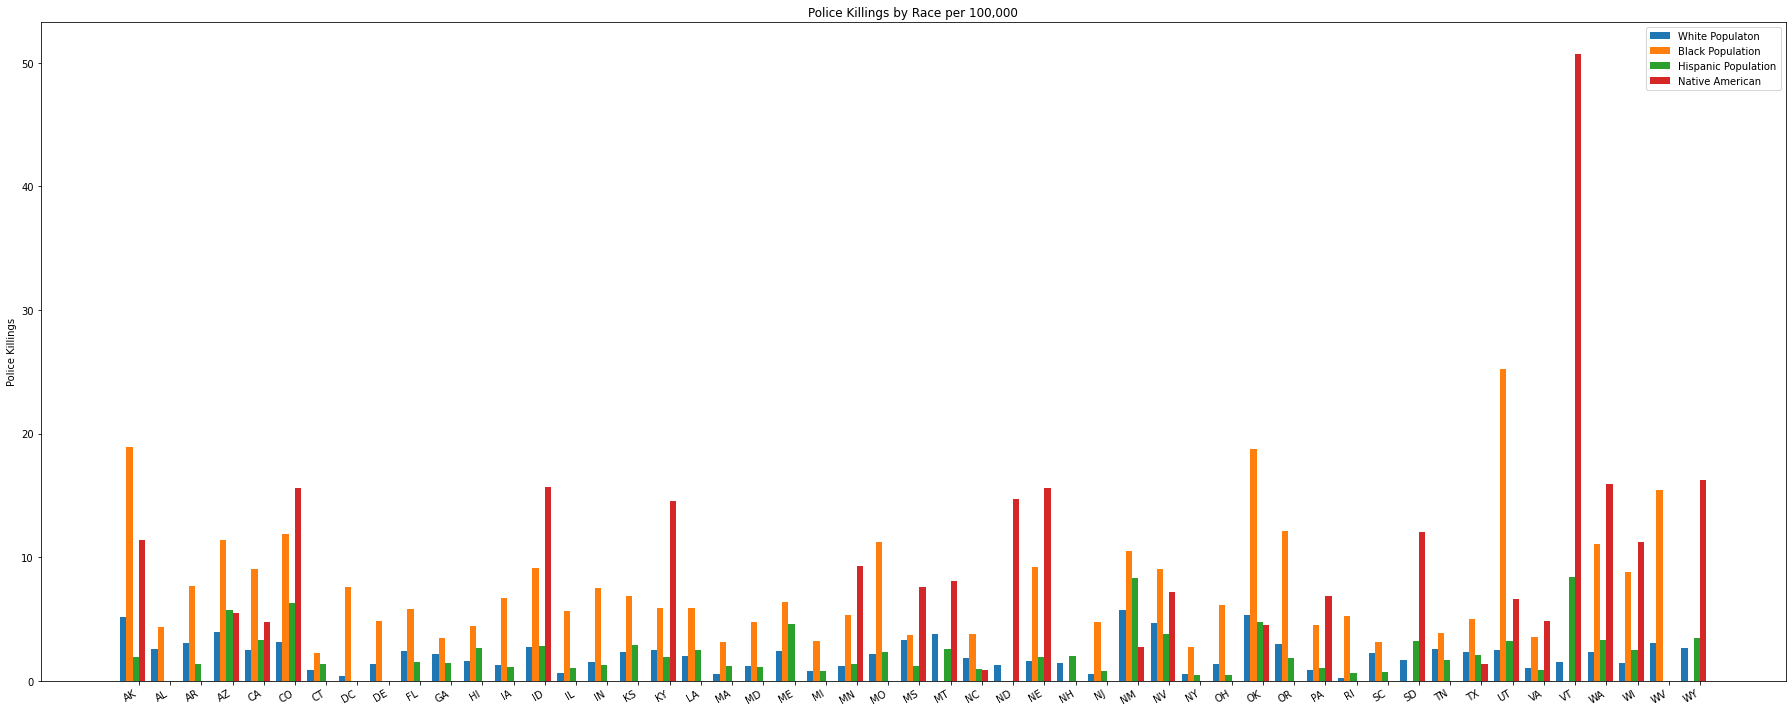

In [ ]:
import numpy as np
per_ten = compare_per_100k[[
                      'White', 'Black', 'Hispanic','Native American']]

x = np.arange(len(per_ten))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
i = 0
for elt in per_ten.columns:
    barplot = ax.bar(x + width/2 + (i-3)*width, per_ten[elt], width)
    i+=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race per 100,000')
ax.set_xticks(x)
ax.set_xticklabels(per_ten.index, rotation=30, horizontalalignment='right')
ax.legend([ 'White Populaton', 'Black Population', 'Hispanic Population','Native American'])

fig.tight_layout()

plt.show()

## In some states the population for Native Americans is so low, that a single police killing can result in a very skewed per 100,000 individuals (e.g. in Vermont only 1 Native American was killed between 2015 and 2020, but the population of Native Americans in Vermont is less than 2,000 thus it results in a massive spike per 100,000 individuals). I removed Native Americans for the last graph just to give another perspective when comparing between Black individuals, White individuals and Hispanic individuals.

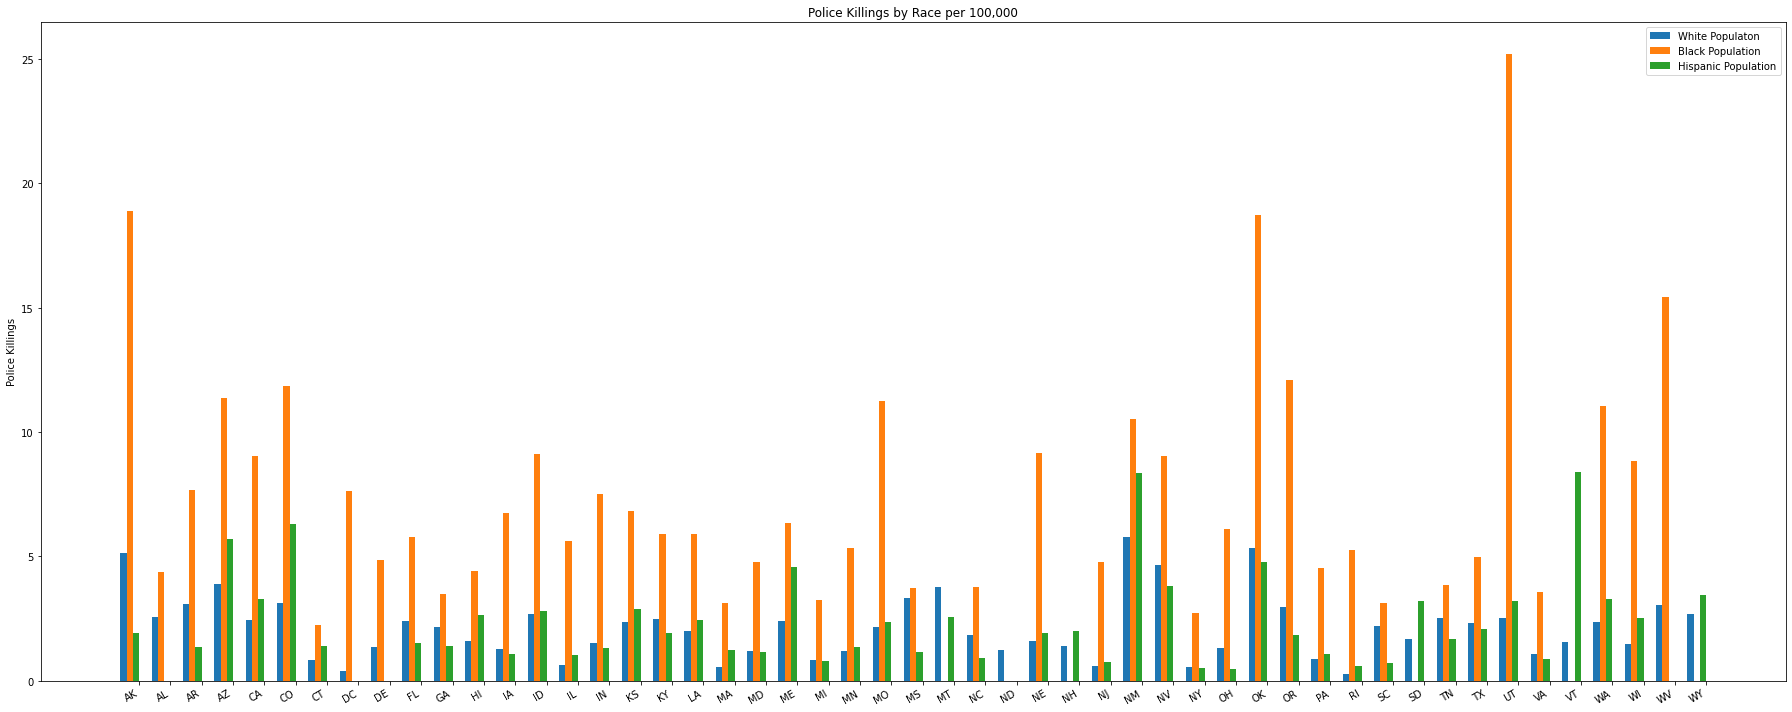

In [ ]:
import numpy as np
per_ten = compare_per_100k[['White', 'Black', 'Hispanic']]

x = np.arange(len(per_ten))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
i = 0
for elt in per_ten.columns:
    barplot = ax.bar(x + width/2 + (i-3)*width, per_ten[elt], width)
    i+=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race per 100,000')
ax.set_xticks(x)
ax.set_xticklabels(per_ten.index, rotation=30, horizontalalignment='right')
ax.legend(['White Populaton', 'Black Population', 'Hispanic Population'])

fig.tight_layout()

plt.show()

## Extracting year from the data to project year wise police killings

In [ ]:
df_copy['year'] = pd.DatetimeIndex(df_copy['date']).year

In [ ]:
def padding(data,max):
  for x in range(data.size,max):
    data=np.append(data,0)
  return data

In [ ]:
df_race=df_copy.groupby(["year",'race']).count()
df_race

name  age  ...  New_age_median  New_age_interpolate
year race                         ...                                     
2013 Asian               18   18  ...              18                   18
     Black              287  286  ...             287                  287
     Hispanic           166  164  ...             166                  166
     Native American      4    4  ...               4                    4
     Pacific Islander     2    2  ...               2                    2
     Unknown race       190  180  ...             190                  190
     White              422  421  ...             422                  422
2014 Asian               16   16  ...              16                   16
     Black              277  274  ...             277                  277
     Hispanic           182  181  ...             182                  182
     Native American     10   10  ...              10                   10
     Pacific Islander     5    5  ...               5                    5
     Unknown race        85   77  ...              85                   85
     White              475  470  ...             475                  475
2015 Asian               29   29  ...              29                   29
     Black              305  304  ...             305                  305
     Hispanic           195  193  ...             195                  195
     Native American     13   13  ...              13                   13
     Pacific Islander     4    4  ...               4                    4
     Unknown race        13   11  ...              13                   13
     White              543  543  ...             543                  543
2016 Asian               14   14  ...              14                   14
     Black              279  277  ...             279                  279
     Hispanic           193  190  ...             193                  193
     Native American     23   23  ...              23                   23
     Pacific Islander     6    6  ...               6                    6
     Unknown race        22   20  ...              22                   22
     White              533  530  ...             533                  533
2017 Asian               12   12  ...              12                   12
     Black              276  272  ...             276                  276
     Hispanic           225  213  ...             225                  225
     Native American     28   27  ...              28                   28
     Pacific Islander     6    6  ...               6                    6
     Unknown race        39   25  ...              39                   39
     White              505  499  ...             505                  505
2018 Asian               13   13  ...              13                   13
     Black              259  253  ...             259                  259
     Hispanic           193  182  ...             193                  193
     Native American     21   19  ...              21                   21
     Pacific Islander    10   10  ...              10                   10
     Unknown race       148   96  ...             148                  148
     White              501  493  ...             501                  501
2019 Asian               18   18  ...              18                   18
     Black              277  274  ...             277                  277
     Hispanic           190  186  ...             190                  190
     Native American     13   12  ...              13                   13
     Pacific Islander     9    9  ...               9                    9
     Unknown race       148  122  ...             148                  148
     White              444  441  ...             444                  444
2020 Asian               10    9  ...              10                   10
     Black              161  157  ...             161                  161
     Hispanic           112  105  ...           

In [ ]:
df_copy.groupby(["year","race"]).count()

name  age  ...  New_age_median  New_age_interpolate
year race                         ...                                     
2013 Asian               18   18  ...              18                   18
     Black              287  286  ...             287                  287
     Hispanic           166  164  ...             166                  166
     Native American      4    4  ...               4                    4
     Pacific Islander     2    2  ...               2                    2
     Unknown race       190  180  ...             190                  190
     White              422  421  ...             422                  422
2014 Asian               16   16  ...              16                   16
     Black              277  274  ...             277                  277
     Hispanic           182  181  ...             182                  182
     Native American     10   10  ...              10                   10
     Pacific Islander     5    5  ...               5                    5
     Unknown race        85   77  ...              85                   85
     White              475  470  ...             475                  475
2015 Asian               29   29  ...              29                   29
     Black              305  304  ...             305                  305
     Hispanic           195  193  ...             195                  195
     Native American     13   13  ...              13                   13
     Pacific Islander     4    4  ...               4                    4
     Unknown race        13   11  ...              13                   13
     White              543  543  ...             543                  543
2016 Asian               14   14  ...              14                   14
     Black              279  277  ...             279                  279
     Hispanic           193  190  ...             193                  193
     Native American     23   23  ...              23                   23
     Pacific Islander     6    6  ...               6                    6
     Unknown race        22   20  ...              22                   22
     White              533  530  ...             533                  533
2017 Asian               12   12  ...              12                   12
     Black              276  272  ...             276                  276
     Hispanic           225  213  ...             225                  225
     Native American     28   27  ...              28                   28
     Pacific Islander     6    6  ...               6                    6
     Unknown race        39   25  ...              39                   39
     White              505  499  ...             505                  505
2018 Asian               13   13  ...              13                   13
     Black              259  253  ...             259                  259
     Hispanic           193  182  ...             193                  193
     Native American     21   19  ...              21                   21
     Pacific Islander    10   10  ...              10                   10
     Unknown race       148   96  ...             148                  148
     White              501  493  ...             501                  501
2019 Asian               18   18  ...              18                   18
     Black              277  274  ...             277                  277
     Hispanic           190  186  ...             190                  190
     Native American     13   12  ...              13                   13
     Pacific Islander     9    9  ...               9                    9
     Unknown race       148  122  ...             148                  148
     White              444  441  ...             444                  444
2020 Asian               10    9  ...              10                   10
     Black              161  157  ...             161                  161
     Hispanic           112  105  ...           

In [ ]:
def pull_race_data_per_year(data, race):
    new_data = data[data["race"] == race]
    sort_data = new_data[["name", "year"]]
    data_grouped = sort_data.groupby('year')["name"].nunique()
    data_df = data_grouped.to_frame()
    data_df = data_df.rename(columns = {"name year" : race + ' Police Killings'})
    return data_df

In [ ]:
df_asian_year=pull_race_data_per_year(df_copy,'Asian')
df_black_year=pull_race_data_per_year(df_copy,'Black')
df_Hispanic_year=pull_race_data_per_year(df_copy,'Hispanic')
df_Native_American_year=pull_race_data_per_year(df_copy,'Native American')
df_Pacific_Islander_year=pull_race_data_per_year(df_copy,'Pacific Islander')
df_White_year=pull_race_data_per_year(df_copy,'White')
df_Unknownrace_year=pull_race_data_per_year(df_copy,'Unknown race')
df_asian_year

,name
year,
2013,18
2014,16
2015,29
2016,14
2017,12
2018,13
2019,18
2020,10


Text(0.5, 1.0, 'Police Killings by Race in Year Wise')

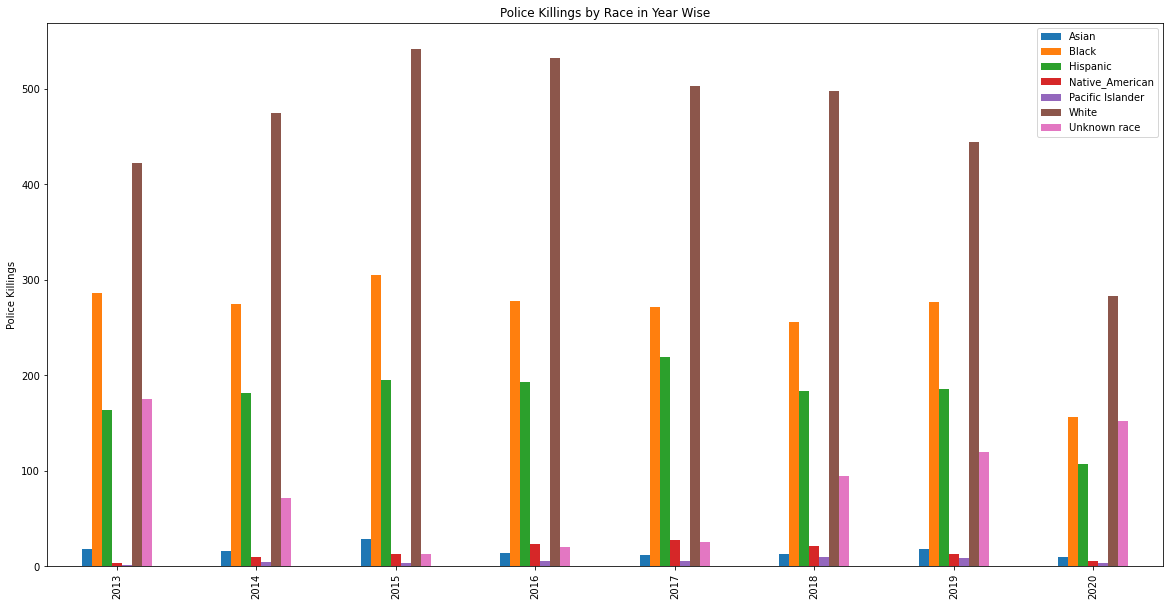

In [ ]:
index = ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020']
df_asian_year
asian=df_asian_year[["name"]].to_numpy()
asian=asian.flatten()
black=df_black_year[["name"]].to_numpy()
black=black.flatten()
Hispanic=df_Hispanic_year[["name"]].to_numpy()
Hispanic=Hispanic.flatten()
Native_American=df_Native_American_year[["name"]].to_numpy()
Native_American=Native_American.flatten()
Pacific_Islander=df_Pacific_Islander_year[["name"]].to_numpy()
Pacific_Islander=Pacific_Islander.flatten()
White=df_White_year[["name"]].to_numpy()
White=White.flatten()
Unknownrace=df_Unknownrace_year[["name"]].to_numpy()
Unknownrace=Unknownrace.flatten()
df_plot = pd.DataFrame({'Asian': asian,'Black':black,'Hispanic':Hispanic,'Native_American':Native_American,'Pacific Islander':Pacific_Islander,
                        'White':White,'Unknown race':Unknownrace}, index=index)
ax = df_plot.plot.bar(figsize=(20,10))
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race in Year Wise')
#asian

Representing number of police kills per year in California

In [ ]:
df_copy

,name,age,gender,race,date,City,State,County,Cause of death,Official disposition of death (justified or other),Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon,Alleged Threat Level,Fleeing,Body Camera,Off-Duty Killing?,Geography,New_age_mean,New_age_mode,New_age_sd,New_age_median,New_age_interpolate,year
0,Name withheld by police,NaN,Male,Unknown race,6/9/2020,Virginia Beach,VA,Virginia Beach City,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN,2020
1,Name withheld by police,NaN,Male,Unknown race,5/9/2020,Chicago,IL,Cook,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN,2020
2,Name withheld by police,61,Male,Unknown race,5/9/2020,San Antonio,TX,Bexar,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,off-duty,NaN,61.000000,61,61.00000,61.0,61.0,2020
3,Name withheld by police,22,Male,Unknown race,5/9/2020,Battle Creek,MI,Calhoun,Gunshot,Pending investigation,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,22.000000,22,22.00000,22.0,22.0,2020
4,Steven D. Smith,33,Male,Unknown race,4/9/2020,Syracuse,NY,Onondaga,Gunshot,Pending investigation,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,33.000000,33,33.00000,33.0,33.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,Pueblo,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Suburban,21.000000,21,21.00000,21.0,21.0,2013
8423,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,Kern,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,26.000000,26,26.00000,26.0,26.0,2013
8424,Tyree Bell,31,Male,Black,1/1/2013,Omaha,NE,Douglas,Gunshot,Grand jury/No bill or Cleared,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,31.000000,31,31.00000,31.0,31.0,2013
8425,Mark Chavez,49,Male,Hispanic,1/1/2013,Farmington,NM,San Juan,Gunshot,Unreported,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,Urban,49.000000,49,49.00000,49.0,49.0,2013


In [ ]:
def pull_race_data_per_year_state(data, race,state):
    new_data = data[data["race"] == race]
    new_data = new_data[new_data["State"] == state]
    sort_data = new_data[["name", "year" , "State"]]
    data_grouped = sort_data.groupby(['year','State'])["name"].nunique()
    data_df = data_grouped.to_frame()
    data_df = data_df.rename(columns = {"state year" : race + ' Police Killings'})
    return data_df

## Police Killings in California based on Race year wise

In [ ]:
df_asian_year_state=pull_race_data_per_year_state(df_copy,'Asian','CA')
df_black_year_state=pull_race_data_per_year_state(df_copy,'Black','CA')
df_Hispanic_year_state=pull_race_data_per_year_state(df_copy,'Hispanic','CA')
df_Native_American_year_state=pull_race_data_per_year_state(df_copy,'Native American','CA')
df_Pacific_Islander_year_state=pull_race_data_per_year_state(df_copy,'Pacific Islander','CA')
df_White_year_state=pull_race_data_per_year_state(df_copy,'White','CA')
df_Unknownrace_year_state=pull_race_data_per_year_state(df_copy,'Unknown race','CA')
df_asian_year_state

,,name
year,State,
2013,CA,9
2014,CA,5
2015,CA,13
2016,CA,4
2017,CA,3
2018,CA,4
2019,CA,6
2020,CA,3


            name
year State      
2013 CA        9
2014 CA        5
2015 CA       13
2016 CA        4
2017 CA        3
2018 CA        4
2019 CA        6
2020 CA        3


Text(0.5, 1.0, 'Police Killings by Race(Year Wise) in California')

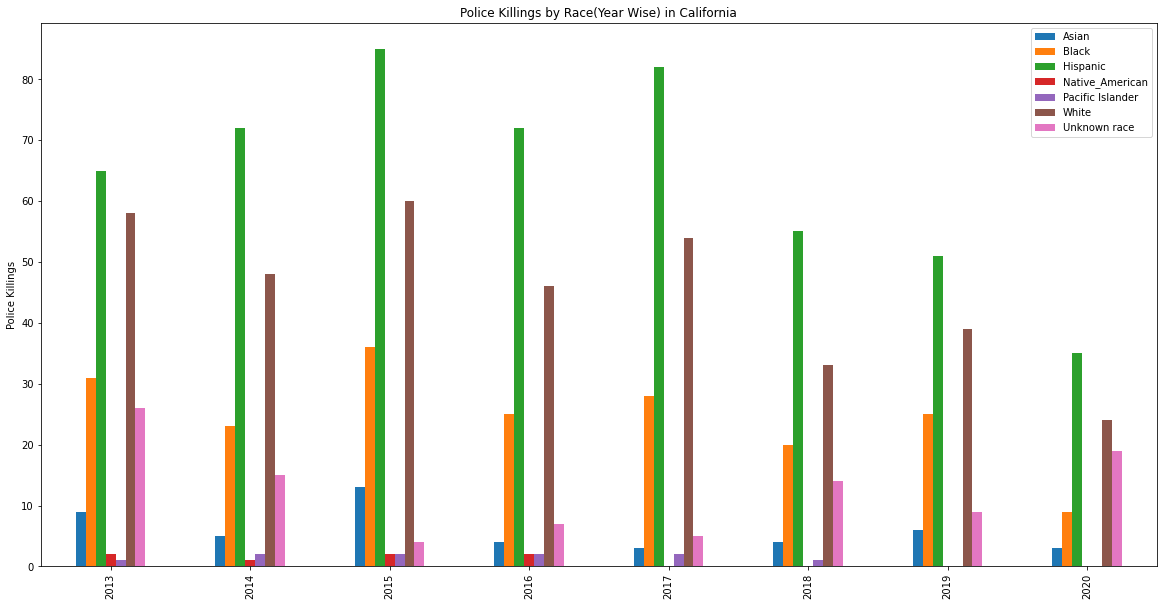

In [ ]:
index = ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020']
print(df_asian_year_state)
asian=df_asian_year_state[["name"]].to_numpy()
asian=asian.flatten()
black=df_black_year_state[["name"]].to_numpy()
black=black.flatten()
Hispanic=df_Hispanic_year_state[["name"]].to_numpy()
Hispanic=Hispanic.flatten()
Native_American=df_Native_American_year_state[["name"]].to_numpy()
Native_American=Native_American.flatten()
Pacific_Islander=df_Pacific_Islander_year_state[["name"]].to_numpy()
Pacific_Islander=Pacific_Islander.flatten()
White=df_White_year_state[["name"]].to_numpy()
White=White.flatten()
Unknownrace=df_Unknownrace_year_state[["name"]].to_numpy()
Unknownrace=Unknownrace.flatten()
maximum=max(asian.size,black.size,Hispanic.size,Native_American.size,Pacific_Islander.size,White.size,Unknownrace.size)
asian=padding(asian,maximum)
black=padding(black,maximum)
Hispanic=padding(Hispanic,maximum)
Native_American=padding(Native_American,maximum)
Pacific_Islander=padding(Pacific_Islander,maximum)
White=padding(White,maximum)
Unknownrace=padding(Unknownrace,maximum)
df_plot = pd.DataFrame({'Asian': asian,'Black':black,'Hispanic':Hispanic,'Native_American':Native_American,'Pacific Islander':Pacific_Islander,
                        'White':White,'Unknown race':Unknownrace}, index=index)
ax = df_plot.plot.bar(figsize=(20,10))
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race(Year Wise) in California')

# Police Killings in Texas based on Race year wise

In [ ]:
df_asian_year_state=pull_race_data_per_year_state(df_copy,'Asian','TX')
df_black_year_state=pull_race_data_per_year_state(df_copy,'Black','TX')
df_Hispanic_year_state=pull_race_data_per_year_state(df_copy,'Hispanic','TX')
df_Native_American_year_state=pull_race_data_per_year_state(df_copy,'Native American','TX')
df_Pacific_Islander_year_state=pull_race_data_per_year_state(df_copy,'Pacific Islander','TX')
df_White_year_state=pull_race_data_per_year_state(df_copy,'White','TX')
df_Unknownrace_year_state=pull_race_data_per_year_state(df_copy,'Unknown race','TX')
df_asian_year_state

,,name
year,State,
2013,TX,2
2014,TX,2
2015,TX,3
2016,TX,1
2017,TX,1
2018,TX,1
2019,TX,2
2020,TX,3


Text(0.5, 1.0, 'Police Killings by Race(Year Wise) in Texas')

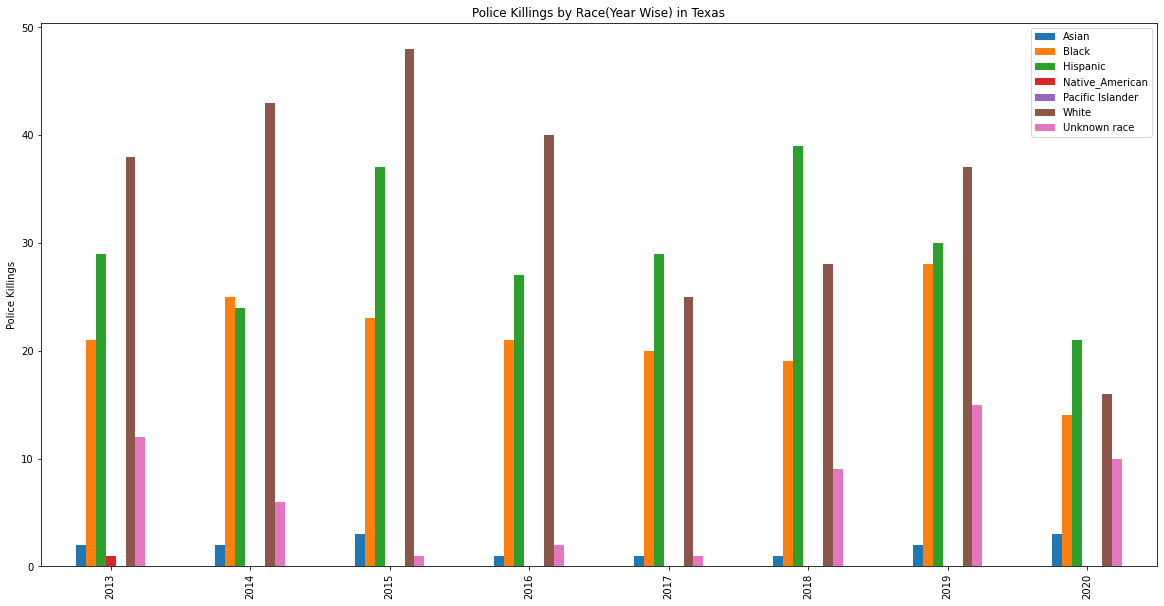

In [ ]:
index = ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020']
df_asian_year
asian=df_asian_year_state[["name"]].to_numpy()
asian=asian.flatten()
black=df_black_year_state[["name"]].to_numpy()
black=black.flatten()
Hispanic=df_Hispanic_year_state[["name"]].to_numpy()
Hispanic=Hispanic.flatten()
Native_American=df_Native_American_year_state[["name"]].to_numpy()
Native_American=Native_American.flatten()
Pacific_Islander=df_Pacific_Islander_year_state[["name"]].to_numpy()
Pacific_Islander=Pacific_Islander.flatten()
White=df_White_year_state[["name"]].to_numpy()
White=White.flatten()
Unknownrace=df_Unknownrace_year_state[["name"]].to_numpy()
Unknownrace=Unknownrace.flatten()
maximum=max(asian.size,black.size,Hispanic.size,Native_American.size,Pacific_Islander.size,White.size,Unknownrace.size)
asian=padding(asian,maximum)
black=padding(black,maximum)
Hispanic=padding(Hispanic,maximum)
Native_American=padding(Native_American,maximum)
Pacific_Islander=padding(Pacific_Islander,maximum)
White=padding(White,maximum)
Unknownrace=padding(Unknownrace,maximum)
df_plot = pd.DataFrame({'Asian': asian,'Black':black,'Hispanic':Hispanic,'Native_American':Native_American,'Pacific Islander':Pacific_Islander,
                        'White':White,'Unknown race':Unknownrace}, index=index)
ax = df_plot.plot.bar(figsize=(20,10))
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race(Year Wise) in Texas')

# Police Killings in New York based on Race year wise

In [ ]:
df_asian_year_state=pull_race_data_per_year_state(df_copy,'Asian','NY')
df_black_year_state=pull_race_data_per_year_state(df_copy,'Black','NY')
df_Hispanic_year_state=pull_race_data_per_year_state(df_copy,'Hispanic','NY')
df_Native_American_year_state=pull_race_data_per_year_state(df_copy,'Native American','NY')
df_Pacific_Islander_year_state=pull_race_data_per_year_state(df_copy,'Pacific Islander','NY')
df_White_year_state=pull_race_data_per_year_state(df_copy,'White','NY')
df_Unknownrace_year_state=pull_race_data_per_year_state(df_copy,'Unknown race','NY')
df_black_year_state

,,name
year,State,
2013,NY,13
2014,NY,11
2015,NY,11
2016,NY,11
2017,NY,8
2018,NY,7
2019,NY,10
2020,NY,7


Text(0.5, 1.0, 'Police Killings by Race(Year Wise) in New York')

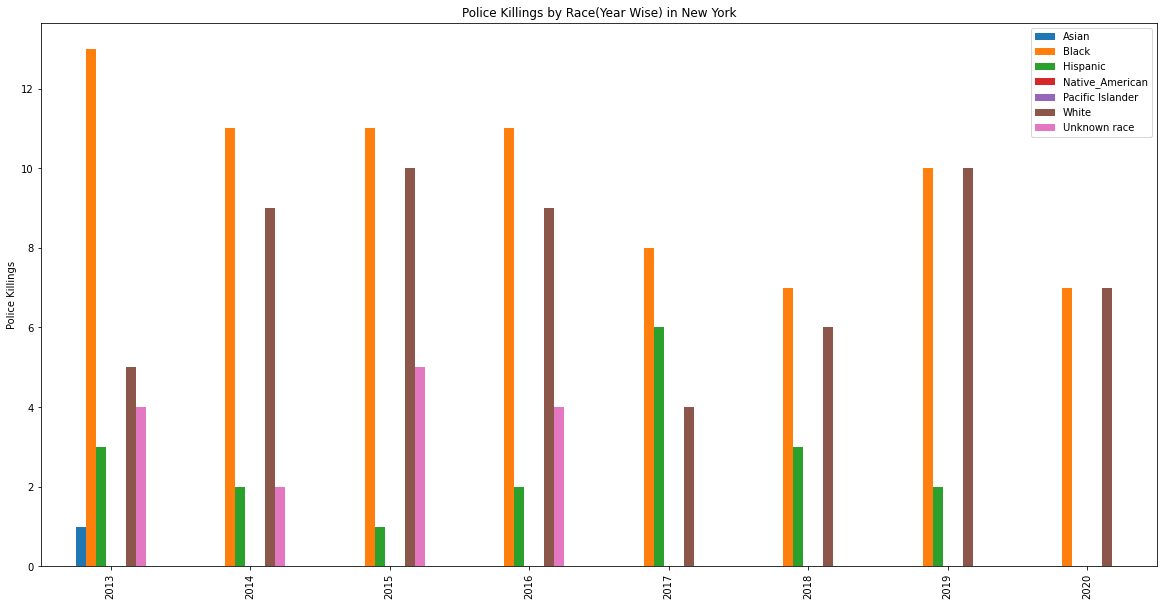

In [ ]:
index = ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020']
df_asian_year
asian=df_asian_year_state[["name"]].to_numpy()
asian=asian.flatten()
black=df_black_year_state[["name"]].to_numpy()
black=black.flatten()
Hispanic=df_Hispanic_year_state[["name"]].to_numpy()
Hispanic=Hispanic.flatten()
Native_American=df_Native_American_year_state[["name"]].to_numpy()
Native_American=Native_American.flatten()
Pacific_Islander=df_Pacific_Islander_year_state[["name"]].to_numpy()
Pacific_Islander=Pacific_Islander.flatten()
White=df_White_year_state[["name"]].to_numpy()
White=White.flatten()
Unknownrace=df_Unknownrace_year_state[["name"]].to_numpy()
Unknownrace=Unknownrace.flatten()
maximum=max(asian.size,black.size,Hispanic.size,Native_American.size,Pacific_Islander.size,White.size,Unknownrace.size)
asian=padding(asian,maximum)
black=padding(black,maximum)
Hispanic=padding(Hispanic,maximum)
Native_American=padding(Native_American,maximum)
Pacific_Islander=padding(Pacific_Islander,maximum)
White=padding(White,maximum)
Unknownrace=padding(Unknownrace,maximum)
df_plot = pd.DataFrame({'Asian': asian,'Black':black,'Hispanic':Hispanic,'Native_American':Native_American,'Pacific Islander':Pacific_Islander,
                        'White':White,'Unknown race':Unknownrace}, index=index)
ax = df_plot.plot.bar(figsize=(20,10))
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race(Year Wise) in New York')

In [ ]:
df_copy

,name,age,gender,race,date,City,State,County,Cause of death,Official disposition of death (justified or other),Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon,Alleged Threat Level,Fleeing,Body Camera,Off-Duty Killing?,Geography,New_age_mean,New_age_mode,New_age_sd,New_age_median,New_age_interpolate,year
0,Name withheld by police,NaN,Male,Unknown race,6/9/2020,Virginia Beach,VA,Virginia Beach City,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN,2020
1,Name withheld by police,NaN,Male,Unknown race,5/9/2020,Chicago,IL,Cook,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,36.827734,25,13.14515,35.0,NaN,2020
2,Name withheld by police,61,Male,Unknown race,5/9/2020,San Antonio,TX,Bexar,Gunshot,Pending investigation,No,Allegedly Armed,knife,attack,Not fleeing,NaN,off-duty,NaN,61.000000,61,61.00000,61.0,61.0,2020
3,Name withheld by police,22,Male,Unknown race,5/9/2020,Battle Creek,MI,Calhoun,Gunshot,Pending investigation,Drug or alcohol use,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,22.000000,22,22.00000,22.0,22.0,2020
4,Steven D. Smith,33,Male,Unknown race,4/9/2020,Syracuse,NY,Onondaga,Gunshot,Pending investigation,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,33.000000,33,33.00000,33.0,33.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,Pueblo,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Suburban,21.000000,21,21.00000,21.0,21.0,2013
8423,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,Kern,Gunshot,Justified,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,26.000000,26,26.00000,26.0,26.0,2013
8424,Tyree Bell,31,Male,Black,1/1/2013,Omaha,NE,Douglas,Gunshot,Grand jury/No bill or Cleared,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,Urban,31.000000,31,31.00000,31.0,31.0,2013
8425,Mark Chavez,49,Male,Hispanic,1/1/2013,Farmington,NM,San Juan,Gunshot,Unreported,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,Urban,49.000000,49,49.00000,49.0,49.0,2013


## Top Ten States with Highest Police Killings

In [ ]:
top10States= df_copy.State.value_counts().head(10)
top10States

CA    1294
TX     780
FL     607
AZ     373
GA     293
CO     263
WA     239
OK     235
NC     232
OH     229
Name: State, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

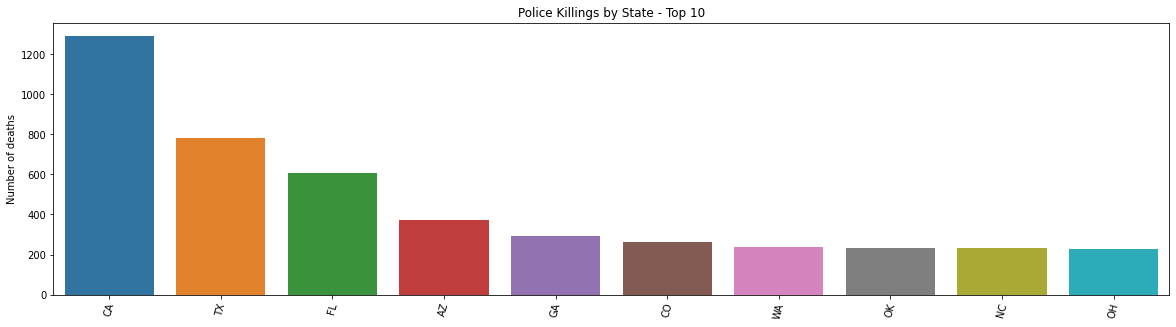

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 5))
plt.title("Police Killings by State - Top 10")
plt.xticks(rotation=75)
sns.barplot(top10States.index, top10States)
plt.ylabel('Number of deaths')

# Ten states with Lowest Kills

In [ ]:
bottom10States= df_copy.State.value_counts().tail(10)

In [ ]:
bottom10States

HI    39
ME    34
DC    27
SD    26
WY    22
DE    21
NH    18
ND    14
VT    12
RI     6
Name: State, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

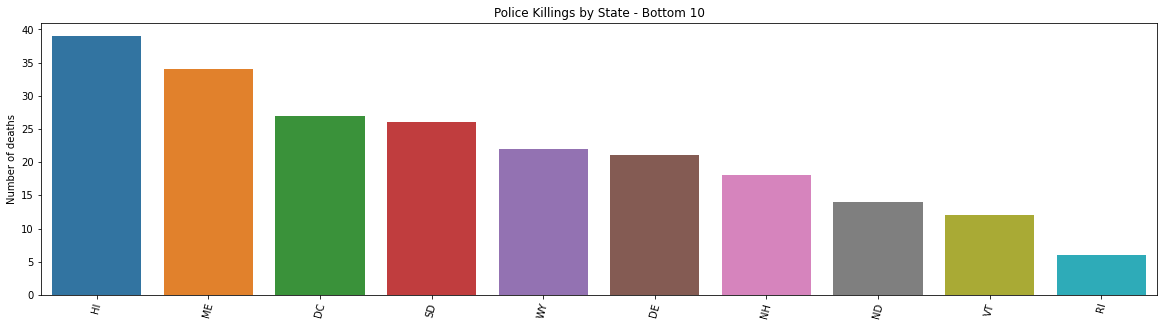

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Police Killings by State - Bottom 10")
plt.xticks(rotation=75)
sns.barplot(bottom10States.index, bottom10States)
plt.ylabel('Number of deaths')

# 20 Counties with Highest Police Killings

In [ ]:
top20Counties = df_copy.County.value_counts().head(20)

In [ ]:
top20Counties

Los Angeles       359
Maricopa          230
Harris            135
Jefferson         122
Orange            121
Cook              115
Clark             115
San Bernardino     96
Dallas             96
Riverside          93
Miami-Dade         83
San Diego          79
Franklin           75
Jackson            73
Bexar              67
Montgomery         66
Washington         64
Kern               63
King               61
St. Louis          60
Name: County, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

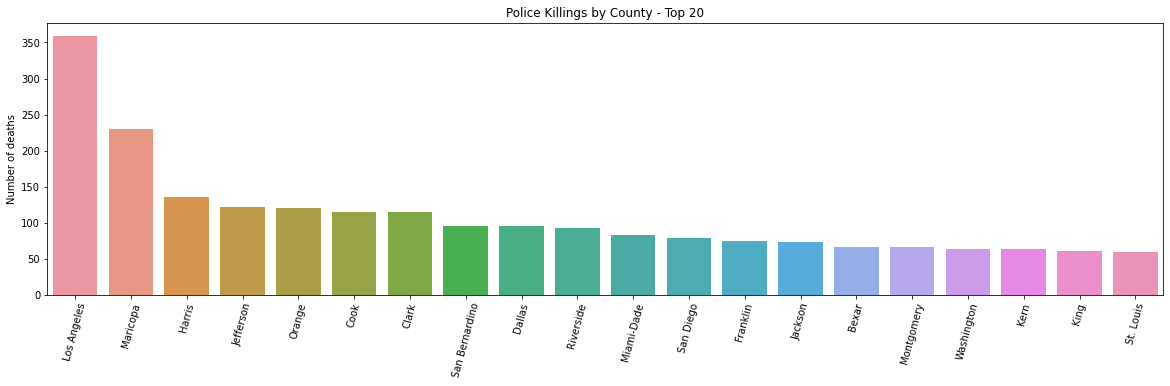

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Police Killings by County - Top 20")
plt.xticks(rotation=75)
sns.barplot(top20Counties.index, top20Counties)
plt.ylabel('Number of deaths')

# 20 Counties with Lowest Kills

In [ ]:
bottom20Counties = df_copy.County.value_counts().tail(25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

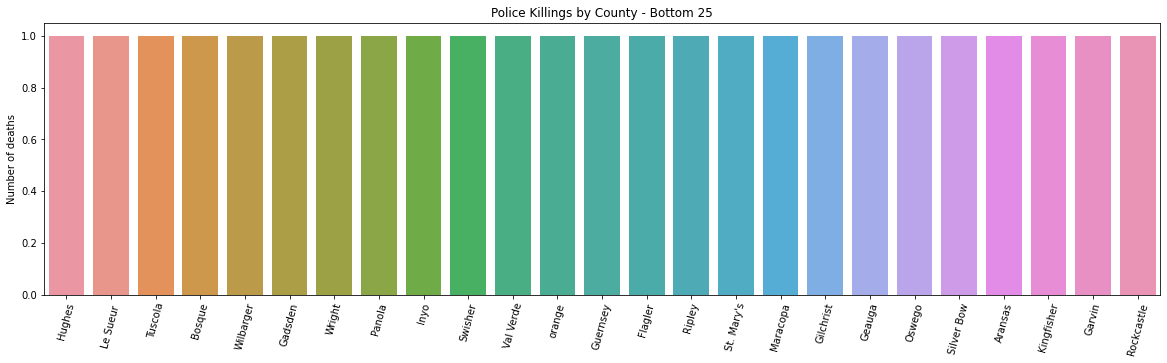

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Police Killings by County - Bottom 25")
plt.xticks(rotation=75)
sns.barplot(bottom20Counties.index, bottom20Counties)
plt.ylabel('Number of deaths')

# *20* Cities with Highest Kills

In [ ]:
top20Cities = df_copy.City.value_counts().head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

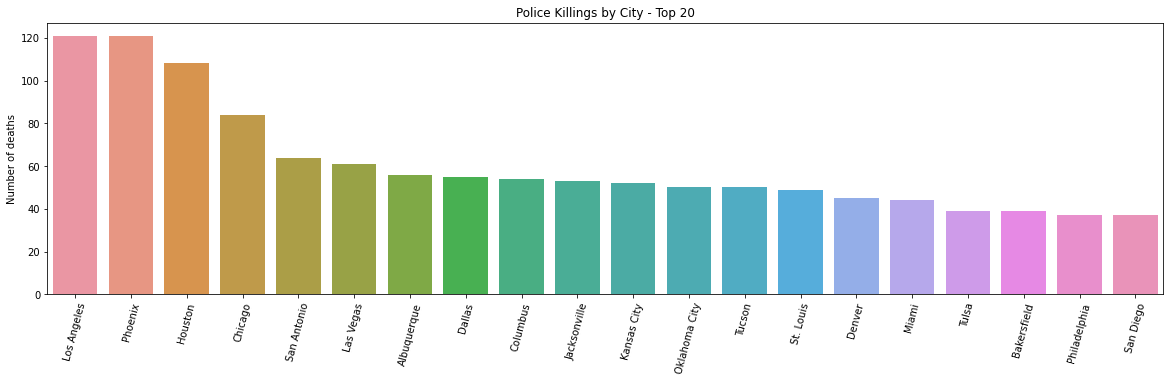

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Police Killings by City - Top 20")
plt.xticks(rotation=75)
sns.barplot(top20Cities.index, top20Cities)
plt.ylabel('Number of deaths')

# *20* Cities with Lowest Police Killings

In [ ]:
bottom20Cities = df_copy.City.value_counts().tail(20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of deaths')

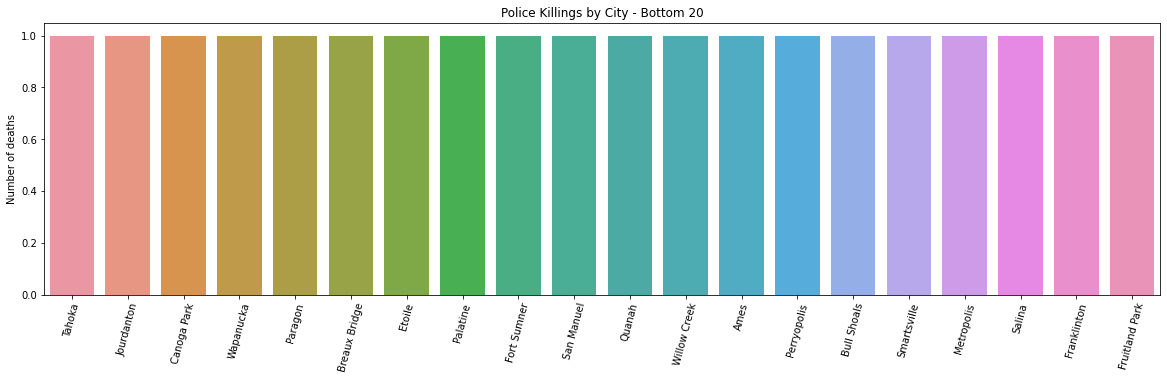

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Police Killings by City - Bottom 20")
plt.xticks(rotation=75)
sns.barplot(bottom20Cities.index, bottom20Cities)
plt.ylabel('Number of deaths')

Text(0.5, 1.02, 'Police Killings based on type of Weapon')

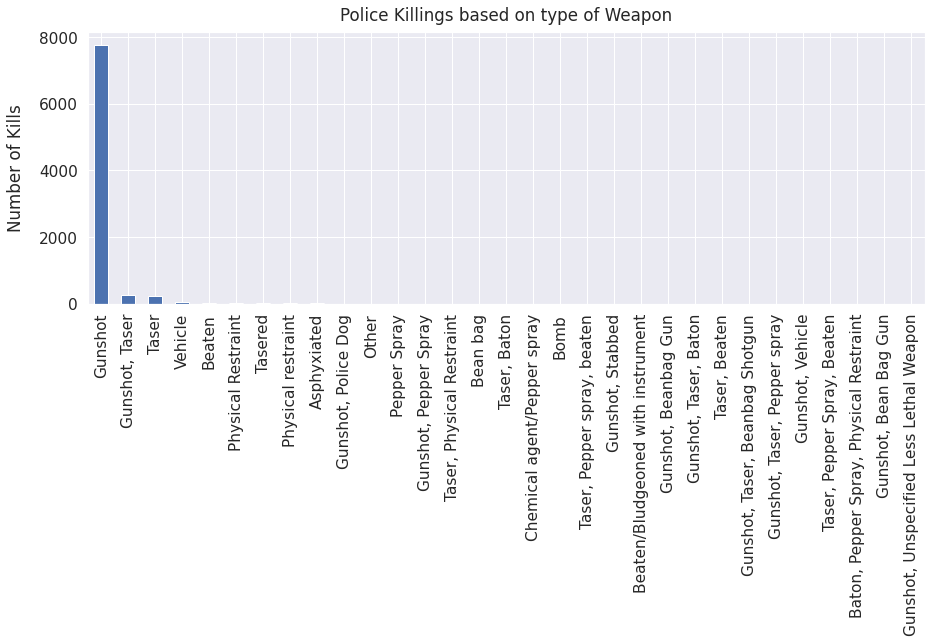

In [ ]:
sns.set(font_scale=1.4)
df_copy['Cause of death'].value_counts().plot(kind='bar',figsize=(15,5),rot=90)
plt.title('Number of Kills ', y=1.02)
plt.ylabel('Number of Kills',labelpad=14)
plt.title("Police Killings based on type of Weapon",y=1.02)

Text(0.5, 1.02, 'Fleeing or not')

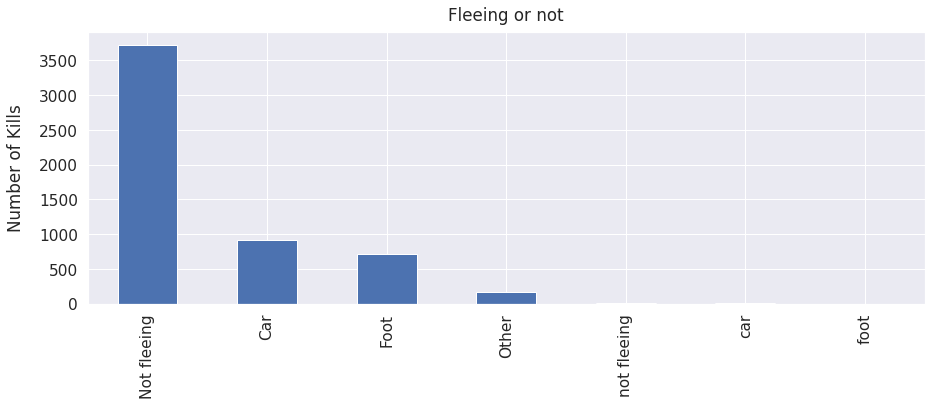

In [ ]:
sns.set(font_scale=1.4)
df_copy['Fleeing'].value_counts().plot(kind='bar',figsize=(15,5),rot=90)
plt.title('Number of Kills ', y=1.02)
plt.ylabel('Number of Kills',labelpad=14)
plt.title("Fleeing or not",y=1.02)

Text(0.5, 1.02, 'Number of Kills per Year')

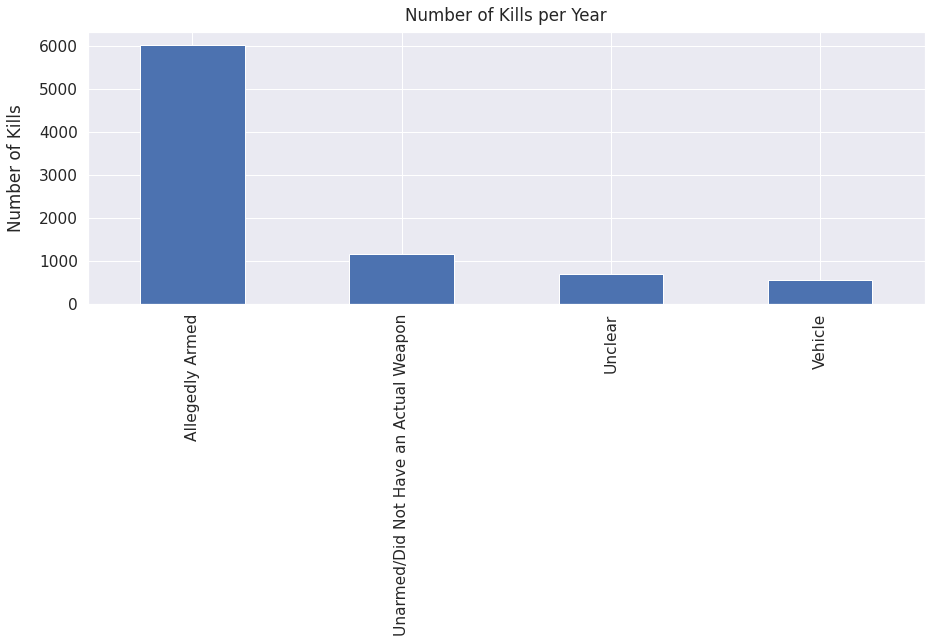

In [ ]:
sns.set(font_scale=1.4)
df_copy['Unarmed/Did Not Have an Actual Weapon'].value_counts().plot(kind='bar',figsize=(15,5),rot=90)
plt.title('Number of Kills ', y=1.02)
plt.ylabel('Number of Kills',labelpad=14)
plt.title("Number of Kills per Year",y=1.02)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


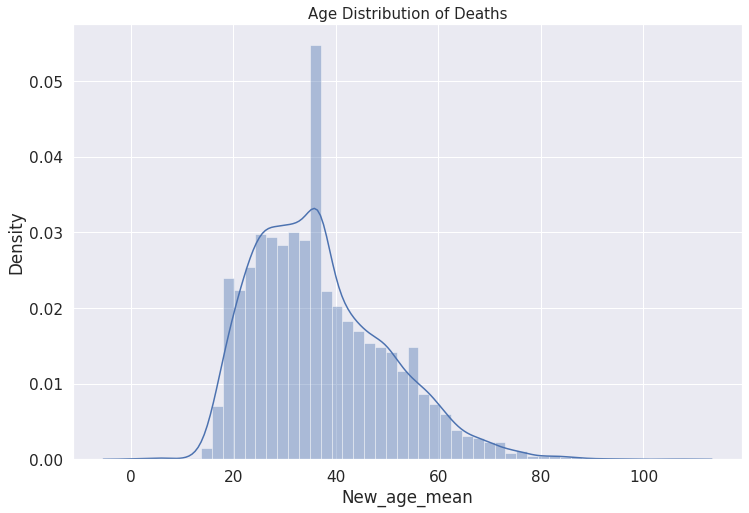

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Deaths', fontsize=15)
sns.distplot(df_copy.New_age_mean)

In [ ]:
df_copy.drop(df.index[df_copy['Symptoms of mental illness?'] == 'unknown'], inplace=True)
df_copy['Symptoms of mental illness?'].value_counts()

No                     5355
Yes                    1585
Unknown                1158
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

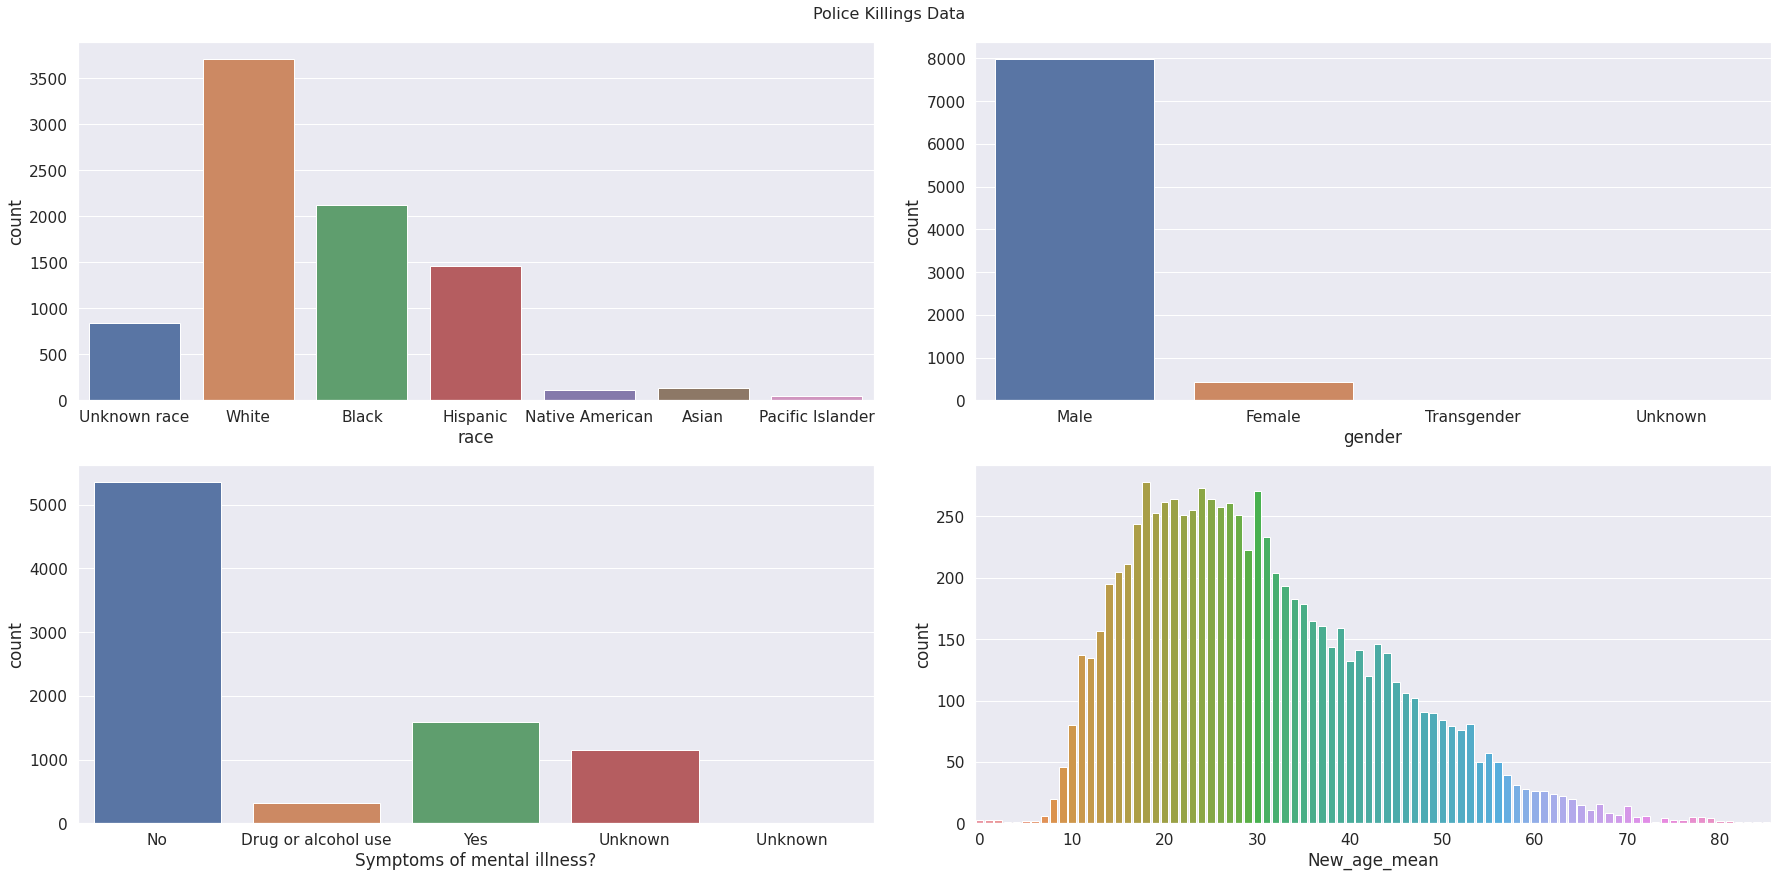

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 12))

sns.countplot(x='race', orient='v', ax=ax1, data=df_copy)
sns.countplot(x='gender', orient='v', ax=ax2, data=df_copy)
sns.countplot(x='Symptoms of mental illness?', orient='v', ax=ax3, data=df_copy)
sns.countplot(x='New_age_mean', orient='v', ax=ax4, data=df_copy)
ax1.set
ax4.set_xticks(range(0, 90, 10))
ax4.set_xticklabels(range(0, 90, 10))
fig.suptitle('Police Killings Data', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()